Epoch 0, Error: 0.5946335329183053
Epoch 1000, Error: 0.09345785066239645
Epoch 2000, Error: 0.04537095046598215
Epoch 3000, Error: 0.03308217762954003
Epoch 4000, Error: 0.0270666448116575
Epoch 5000, Error: 0.023376266844516505
Epoch 6000, Error: 0.020831794350869022
Epoch 7000, Error: 0.018946990938002416
Epoch 8000, Error: 0.0174813701864339
Epoch 9000, Error: 0.0163010292084037

Final output after training:
[[0.00561032]
 [0.01682693]
 [0.01673162]
 [0.97786573]]

Final weights and biases after training:
Weights (Input to Hidden): [[4.26268837 0.76640475]
 [4.2490858  0.55324407]]
Weights (Hidden to Output): [[10.06274948]
 [-1.22453787]]
Biases (Hidden): [[-6.24796218  1.72158253]]
Biases (Output): [[-4.1581863]]


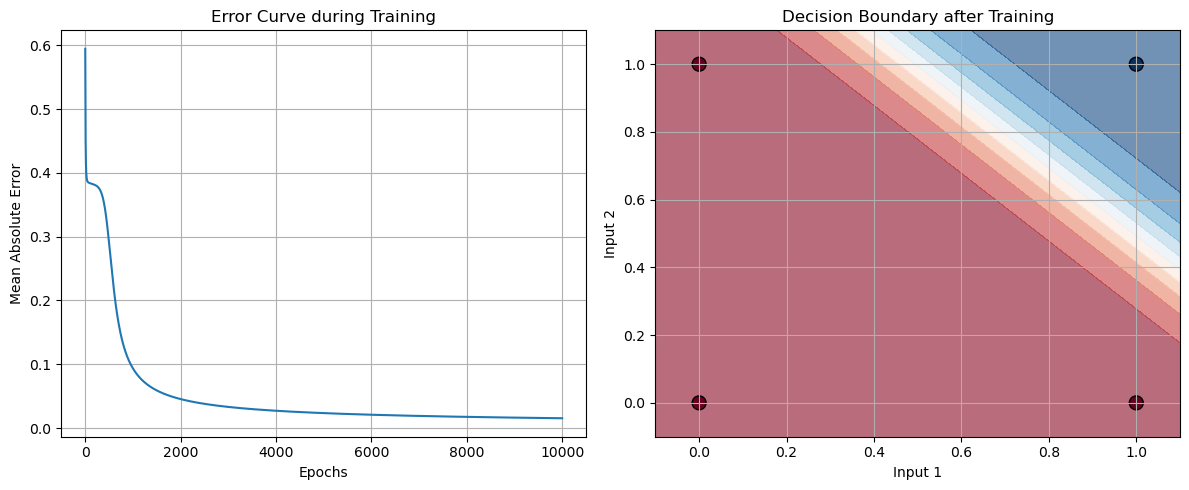

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of the sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

# Training data for the AND gate
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

y = np.array([[0],
              [0],
              [0],
              [1]])

# Set the initial weights and biases
np.random.seed(42)
input_layer_size = 2  # Two inputs
hidden_layer_size = 2  # Two neurons in the hidden layer
output_layer_size = 1  # One output

# Initialize weights and biases
weights_input_hidden = np.random.uniform(0, 1, (input_layer_size, hidden_layer_size))
weights_hidden_output = np.random.uniform(0, 1, (hidden_layer_size, output_layer_size))
bias_hidden = np.random.uniform(0, 1, (1, hidden_layer_size))
bias_output = np.random.uniform(0, 1, (1, output_layer_size))

learning_rate = 0.3  # Learning rate

# Initialize a list to store the error for each epoch
errors = []

# Training the neural network
epochs = 10000  # Number of iterations
for epoch in range(epochs):
    # Forward pass
    hidden_input = np.dot(X, weights_input_hidden) + bias_hidden
    hidden_output = sigmoid(hidden_input)
    final_input = np.dot(hidden_output, weights_hidden_output) + bias_output
    final_output = sigmoid(final_input)

    # Calculate the error (loss)
    error = y - final_output

    # Store the mean absolute error for plotting
    errors.append(np.mean(np.abs(error)))

    # Backpropagation
    d_output = error * sigmoid_derivative(final_output)  # Gradient of the output layer
    d_hidden = d_output.dot(weights_hidden_output.T) * sigmoid_derivative(hidden_output)  # Gradient of the hidden layer

    # Update weights and biases
    weights_hidden_output += hidden_output.T.dot(d_output) * learning_rate
    weights_input_hidden += X.T.dot(d_hidden) * learning_rate
    bias_output += np.sum(d_output, axis=0, keepdims=True) * learning_rate
    bias_hidden += np.sum(d_hidden, axis=0, keepdims=True) * learning_rate

    # Optionally, print the error every 1000 epochs to track progress
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Error: {np.mean(np.abs(error))}")

# Output the final predictions after training
print("\nFinal output after training:")
print(final_output)

# Output final weights and biases
print("\nFinal weights and biases after training:")
print("Weights (Input to Hidden):", weights_input_hidden)
print("Weights (Hidden to Output):", weights_hidden_output)
print("Biases (Hidden):", bias_hidden)
print("Biases (Output):", bias_output)

# Plot the error curve
plt.figure(figsize=(12, 5))

# Plot 1: Error Curve
plt.subplot(1, 2, 1)
plt.plot(errors)
plt.title("Error Curve during Training")
plt.xlabel("Epochs")
plt.ylabel("Mean Absolute Error")
plt.grid(True)

# Plot 2: Decision Boundary
plt.subplot(1, 2, 2)
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = np.c_[xx.ravel(), yy.ravel()]
hidden_input = np.dot(Z, weights_input_hidden) + bias_hidden
hidden_output = sigmoid(hidden_input)
final_input = np.dot(hidden_output, weights_hidden_output) + bias_output
final_output = sigmoid(final_input)
Z = final_output.reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=np.linspace(0, 1, 11), cmap='RdBu', alpha=0.6)
plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), cmap='RdBu', edgecolors='k', marker='o', s=100)
plt.title("Decision Boundary after Training")
plt.xlabel("Input 1")
plt.ylabel("Input 2")
plt.grid(True)

plt.tight_layout()
plt.show()


Epoch 0, Loss: 0.187236
Epoch 2000, Loss: 0.007340
Epoch 4000, Loss: 0.002434
Epoch 6000, Loss: 0.001368
Epoch 8000, Loss: 0.000931
Final Weights - Input to Hidden:
[[ 0.10687656 -1.15972921  3.10757351 -2.93786462]
 [-3.65442403 -0.3467832   0.1233506  -3.0425527 ]]
Final Weights - Hidden to Output:
[[-3.42931305]
 [-0.9924773 ]
 [ 4.02239815]
 [-6.88790288]]

Final Predictions:
[[3.75719615e-04]
 [2.47416972e-02]
 [2.61632998e-02]
 [9.61345210e-01]]


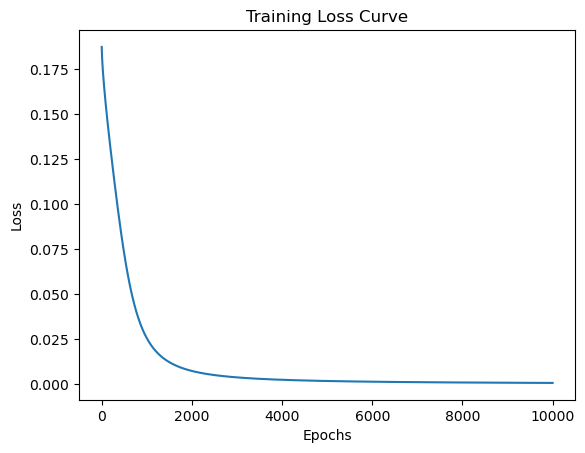

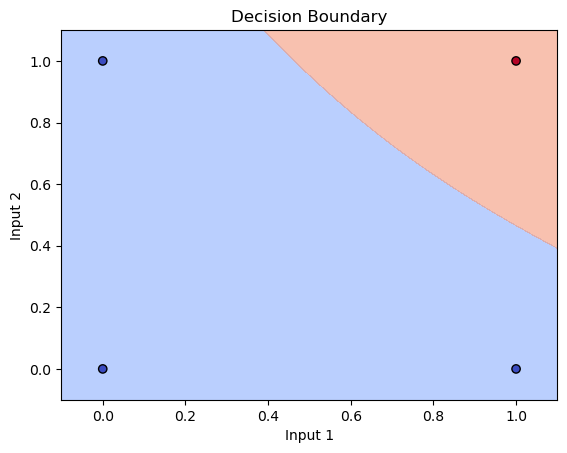

In [16]:
import numpy as np
import matplotlib.pyplot as plt

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        # Initialize weights and biases
        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size)
        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size)
        self.bias_hidden = np.zeros((1, self.hidden_size))
        self.bias_output = np.zeros((1, self.output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def feedforward(self, X):
        self.hidden_activation = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = self.sigmoid(self.hidden_activation)
        self.output_activation = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.predicted_output = self.sigmoid(self.output_activation)
        return self.predicted_output

    def backward(self, X, y, learning_rate):
        output_error = y - self.predicted_output
        output_delta = output_error * self.sigmoid_derivative(self.predicted_output)
        hidden_error = np.dot(output_delta, self.weights_hidden_output.T)
        hidden_delta = hidden_error * self.sigmoid_derivative(self.hidden_output)
        
        self.weights_hidden_output += np.dot(self.hidden_output.T, output_delta) * learning_rate
        self.bias_output += np.sum(output_delta, axis=0, keepdims=True) * learning_rate
        self.weights_input_hidden += np.dot(X.T, hidden_delta) * learning_rate
        self.bias_hidden += np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate
        
        return np.mean(np.square(output_error))

    def train(self, X, y, epochs, learning_rate):
        losses = []
        for epoch in range(epochs):
            self.feedforward(X)
            loss = self.backward(X, y, learning_rate)
            losses.append(loss)
            if epoch % 2000 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.6f}")
        return losses

# AND Gate input and output
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [0], [0], [1]])

nn = NeuralNetwork(input_size=2, hidden_size=4, output_size=1)
losses = nn.train(X, y, epochs=10000, learning_rate=0.1)

# Print final weights
print("Final Weights - Input to Hidden:")
print(nn.weights_input_hidden)
print("Final Weights - Hidden to Output:")
print(nn.weights_hidden_output)

# Print final predictions
final_predictions = nn.feedforward(X)
print("\nFinal Predictions:")
print(final_predictions)

# Plot training loss curve
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.show()

# Decision Boundary
xx, yy = np.meshgrid(np.linspace(-0.1, 1.1, 100), np.linspace(-0.1, 1.1, 100))
X_grid = np.c_[xx.ravel(), yy.ravel()]
preds = nn.feedforward(X_grid).reshape(xx.shape)

plt.contourf(xx, yy, preds, levels=[0, 0.5, 1], alpha=0.6, cmap="coolwarm")
plt.scatter(X[:, 0], X[:, 1], c=y[:, 0], edgecolors='k', cmap="coolwarm")
plt.xlabel("Input 1")
plt.ylabel("Input 2")
plt.title("Decision Boundary")
plt.show()